In [1]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

In [2]:
resnet50 = ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [5]:
img = load_img('/content/dog.jpg', target_size=(224, 224))

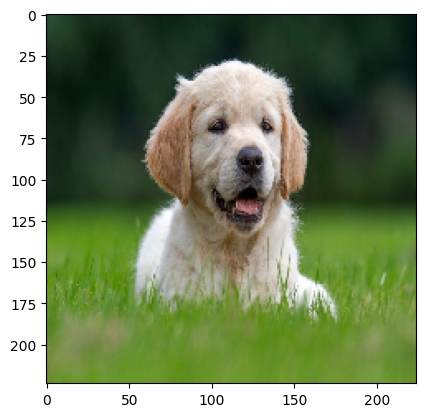

In [7]:
plt.imshow(img)

In [8]:
img = img_to_array(img)

In [9]:
img = img.reshape((1, 224,224,3))

In [10]:
img.shape

(1, 224, 224, 3)

In [11]:
img = preprocess_input(img)

In [12]:
pred = resnet50.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [13]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n02099601', 'golden_retriever', np.float32(0.93775356)),
  ('n02099712', 'Labrador_retriever', np.float32(0.048428625)),
  ('n02104029', 'kuvasz', np.float32(0.0054409667)),
  ('n02101556', 'clumber', np.float32(0.002928362)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.0018471379))]]

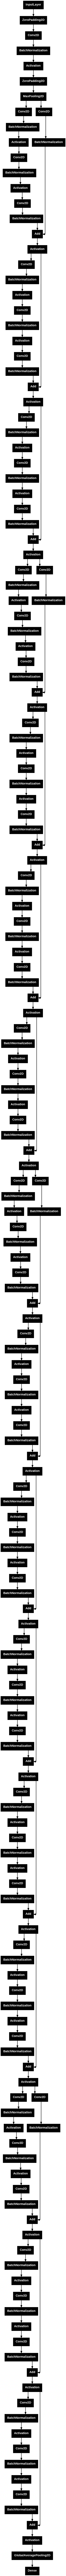

In [14]:
from keras.utils import plot_model
plot_model(resnet50)

In [15]:
resnet50.trainable # bydefault true, we haveto fix weights

True

In [16]:
resnet50 = ResNet50(include_top=False, input_shape=(32,32,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [31]:
from keras.layers import Flatten, Dense

In [32]:
#flatten output layer of resnet

In [56]:
flattened = Flatten()(resnet50.output)

#fully connedted layer 1
fc1 = Dense(128, activation='relu', name='addeddense1')(flattened)
#fully connedted layer 2
fc2 = Dense(64, activation='relu', name='addeddense2')(fc1)
#fully connedted layer 2
fc3 = Dense(34, activation='relu', name='addeddense3')(fc2)
#output layer
fc4 = Dense(10, activation='softmax', name='addeddense4')(fc3)

In [57]:
resnet50.trainable = False;   #freeze weights

In [58]:
from keras.models import Model
model = Model(inputs=resnet50.input, outputs=fc4)

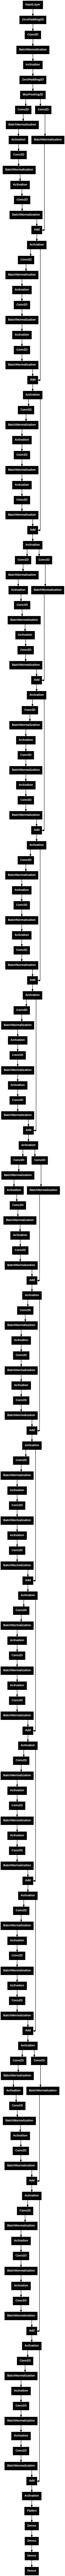

In [59]:
plot_model(model, )

In [60]:
from keras.datasets import cifar10

In [61]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [62]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7350 - loss: 0.7459
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7573 - loss: 0.6838
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7765 - loss: 0.6358


In [50]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5938 - loss: 1.5050


[1.4980133771896362, 0.5979999899864197]